
# Task 1.
### Dataset 수집

### Personalized Learning & Adaptive Education Dataset

출처 : 
https://www.kaggle.com/datasets/adilshamim8/personalized-learning-and-adaptive-education-dataset?resource=download

# Features 

### 케글 사이트에서 제공된 데이터 feature 정보

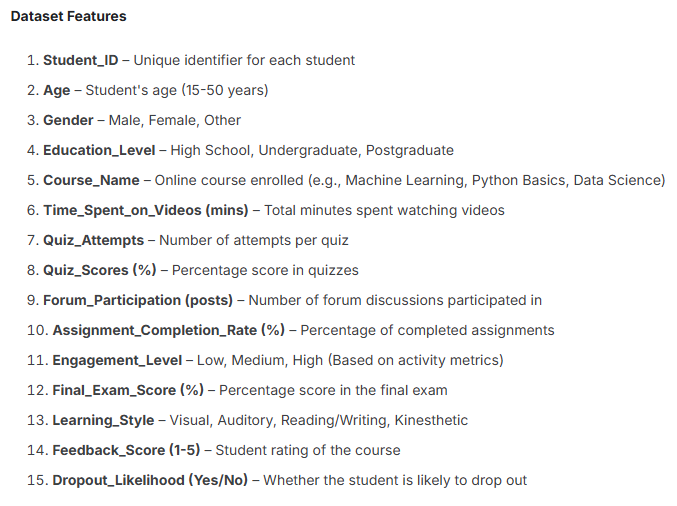

In [1]:
import pandas as pd

data = pd.read_csv('personalized_learning_dataset.csv' )

# Task 2.
### 기초 통계 확인

In [2]:
# 데이터에 대한 간단한 파악

data.head()

,Student_ID,Age,Gender,Education_Level,Course_Name,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Learning_Style,Feedback_Score,Dropout_Likelihood
0,S00001,15,Female,High School,Machine Learning,171,4,67,2,89,Medium,51,Visual,1,No
1,S00002,49,Male,Undergraduate,Python Basics,156,4,64,0,94,Medium,92,Reading/Writing,5,No
2,S00003,20,Female,Undergraduate,Python Basics,217,2,55,2,67,Medium,45,Reading/Writing,1,No
3,S00004,37,Female,Undergraduate,Data Science,489,1,65,43,60,High,59,Visual,4,No
4,S00005,34,Female,Postgraduate,Python Basics,496,3,59,34,88,Medium,93,Visual,3,No


In [3]:
#데이터의 주요한 특징 파악

print(data.info()) 
# 총 10000개의 데이터, 15개의 feature로 구성되어 있음. 
# Student_ID, Gender, Education_Level, Course_Name, Engagement_Level, Learning_Style, Dropout_Likelihood : 범주형
# 그 외 나머지는 수치형 데이터

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Student_ID                  10000 non-null  object
 1   Age                         10000 non-null  int64 
 2   Gender                      10000 non-null  object
 3   Education_Level             10000 non-null  object
 4   Course_Name                 10000 non-null  object
 5   Time_Spent_on_Videos        10000 non-null  int64 
 6   Quiz_Attempts               10000 non-null  int64 
 7   Quiz_Scores                 10000 non-null  int64 
 8   Forum_Participation         10000 non-null  int64 
 9   Assignment_Completion_Rate  10000 non-null  int64 
 10  Engagement_Level            10000 non-null  object
 11  Final_Exam_Score            10000 non-null  int64 
 12  Learning_Style              10000 non-null  object
 13  Feedback_Score              10000 non-null  int

In [4]:
for i, j in enumerate(data.isnull().any(axis=1).to_list()):
    if j == True:
        print(i)

#결측치 모두 없음

In [5]:
#수치형과 범주형 나누기
int_col = []
object_col = []

for col in data.columns:
    if data[col].dtype == 'int64':
        int_col.append(col)
    else:
        object_col.append(col)

In [6]:
# 수치형, 범주형 데이터에 대한 데이터 분석
print(data[int_col].describe())

print(data[object_col].describe())

#범주형 데이터의 label 확인
for col in object_col:
    print(col ,'\n', data[col].unique().tolist())
#결측치가 없음을 확인할 수 있다. 

                Age  Time_Spent_on_Videos  Quiz_Attempts   Quiz_Scores  \
count  10000.000000          10000.000000   10000.000000  10000.000000   
mean      32.137700            255.375400       2.500500     64.578600   
std       10.062647            141.656392       1.122642     20.289125   
min       15.000000             10.000000       1.000000     30.000000   
25%       24.000000            131.000000       1.000000     47.000000   
50%       32.000000            257.000000       3.000000     65.000000   
75%       41.000000            378.000000       4.000000     82.000000   
max       49.000000            499.000000       4.000000     99.000000   

       Forum_Participation  Assignment_Completion_Rate  Final_Exam_Score  \
count         10000.000000                10000.000000      10000.000000   
mean             24.616200                   69.546800         64.697000   
std              14.330305                   17.360782         20.096417   
min               0.000000   

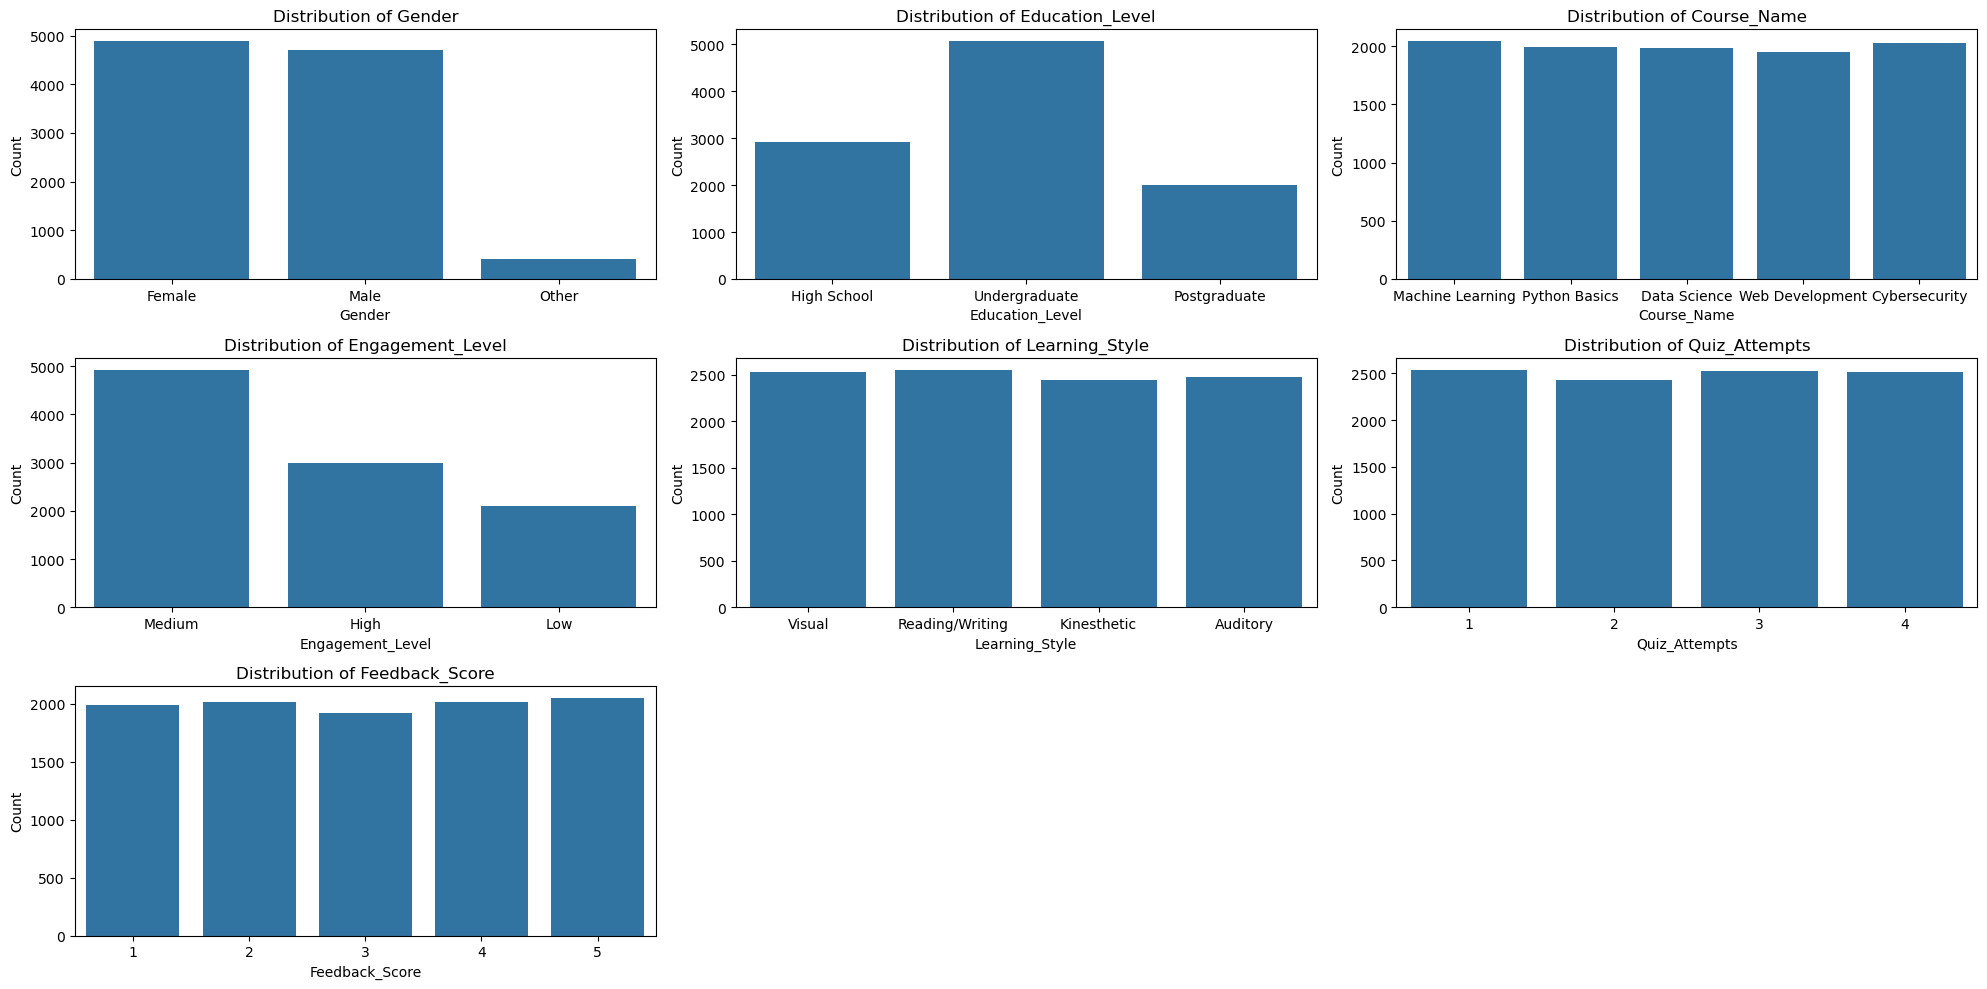

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
categories = ['Gender', 'Education_Level', 'Course_Name', 'Engagement_Level', 'Learning_Style', 'Quiz_Attempts', 'Feedback_Score']

fig, axes = plt.subplots(3, 3, figsize=(20, 10))
axes = axes.flatten()  

for i, category in enumerate(categories):
    sns.countplot(data=data, x=category, ax=axes[i])
    axes[i].set_title(f'Distribution of {category}')
    axes[i].set_xlabel(category)
    axes[i].set_ylabel('Count')

axes[-2].axis('off')
axes[-1].axis('off')

plt.tight_layout()  
plt.show()

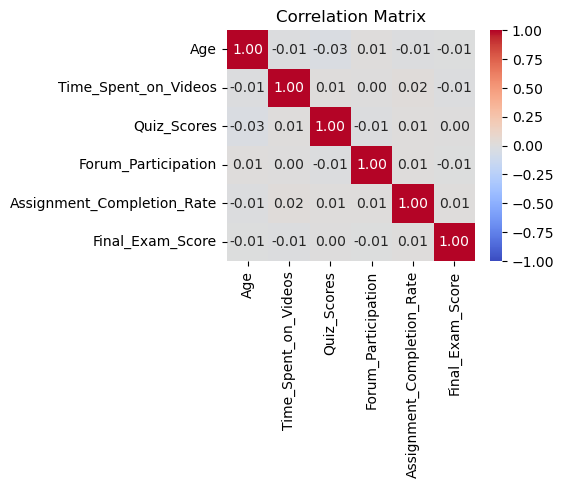

In [8]:
#수치형 변수 간의 상관관계 파악
numeric_columns = ['Age', 'Time_Spent_on_Videos', 'Quiz_Scores',  'Forum_Participation',  'Assignment_Completion_Rate' ,  'Final_Exam_Score']
corr_matrix = data[numeric_columns].corr()

plt.figure(figsize=(4, 3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

plt.title('Correlation Matrix')
plt.show()


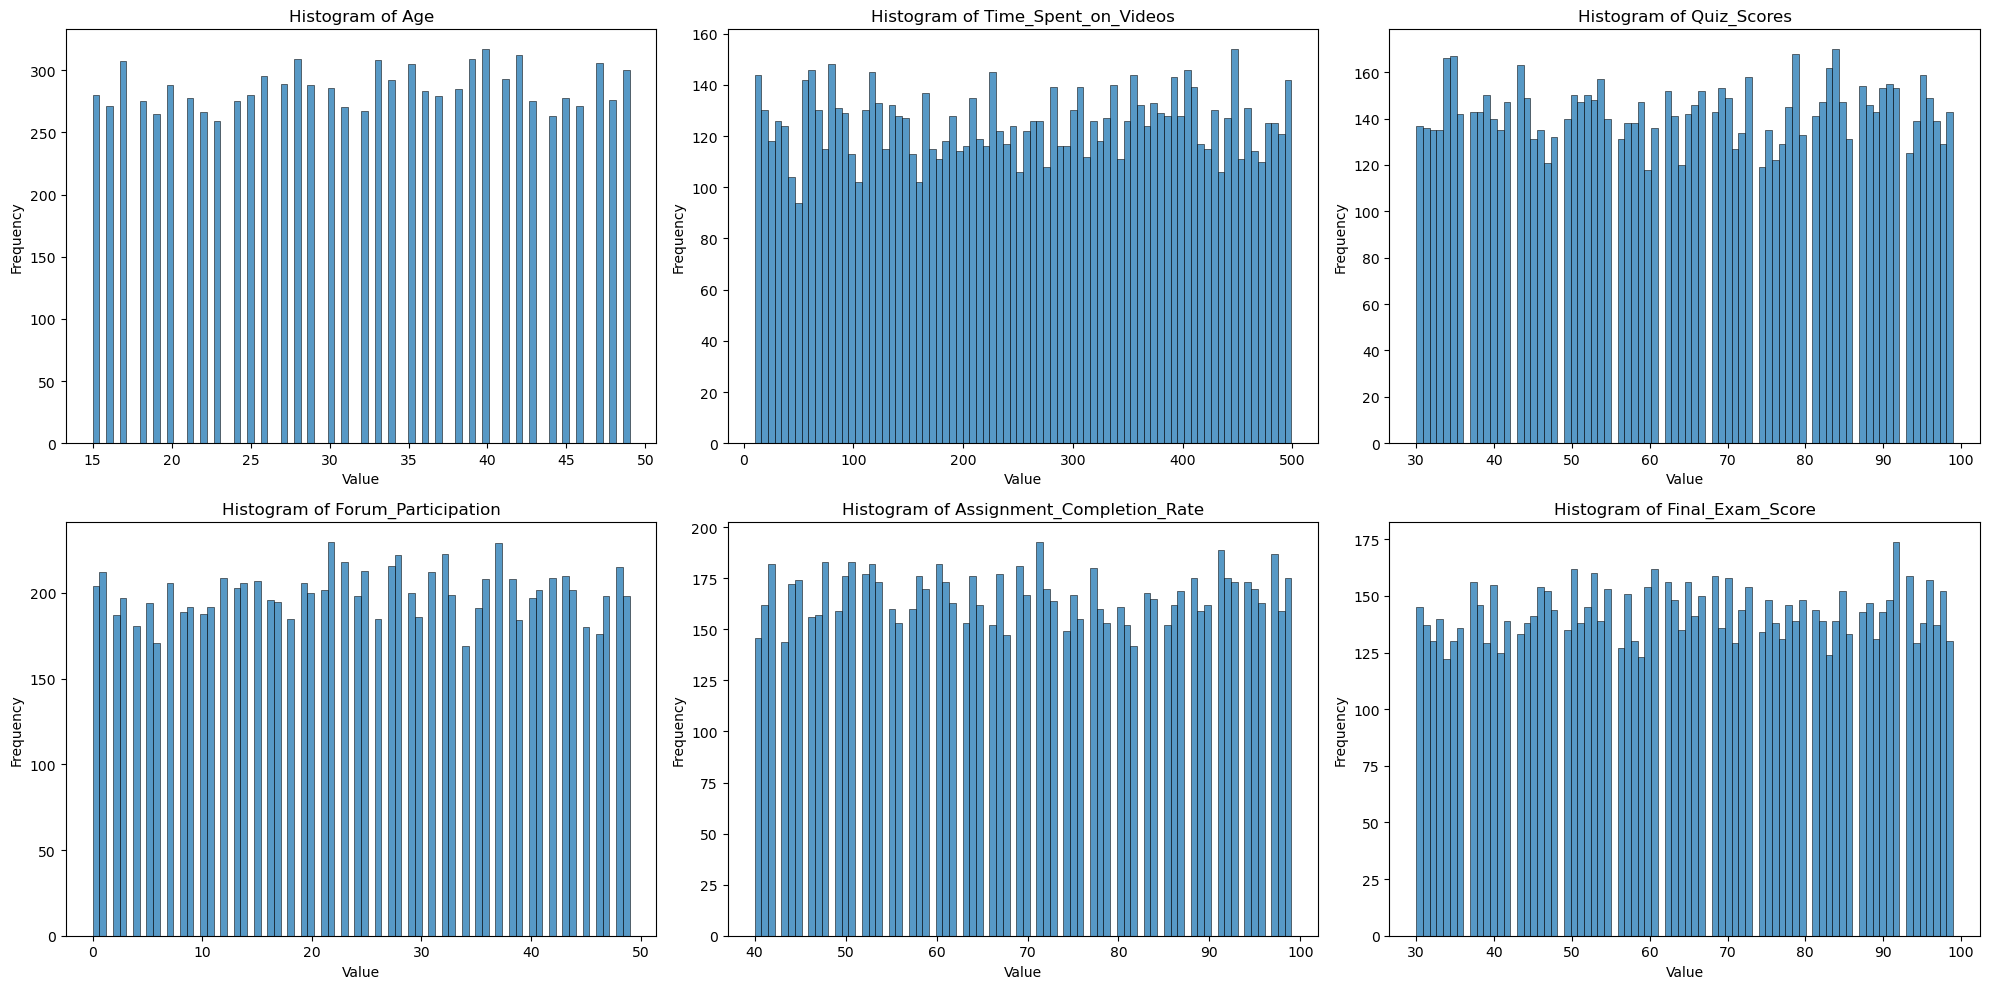

In [9]:
#수치형 변수 시각화
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

for i, col in enumerate(numeric_columns):
    ax = axes[i//3, i%3] 
    sns.histplot(data[col], bins=80, kde=False, edgecolor='black', ax=ax)

    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


#시각화 결과 데이터에 보이는 특별한 분포적인 특성은 없음.
#사실상 'Quiz_Attempts', 'Feedback_Score'는 범주형 자료임을 알 수 있다. 

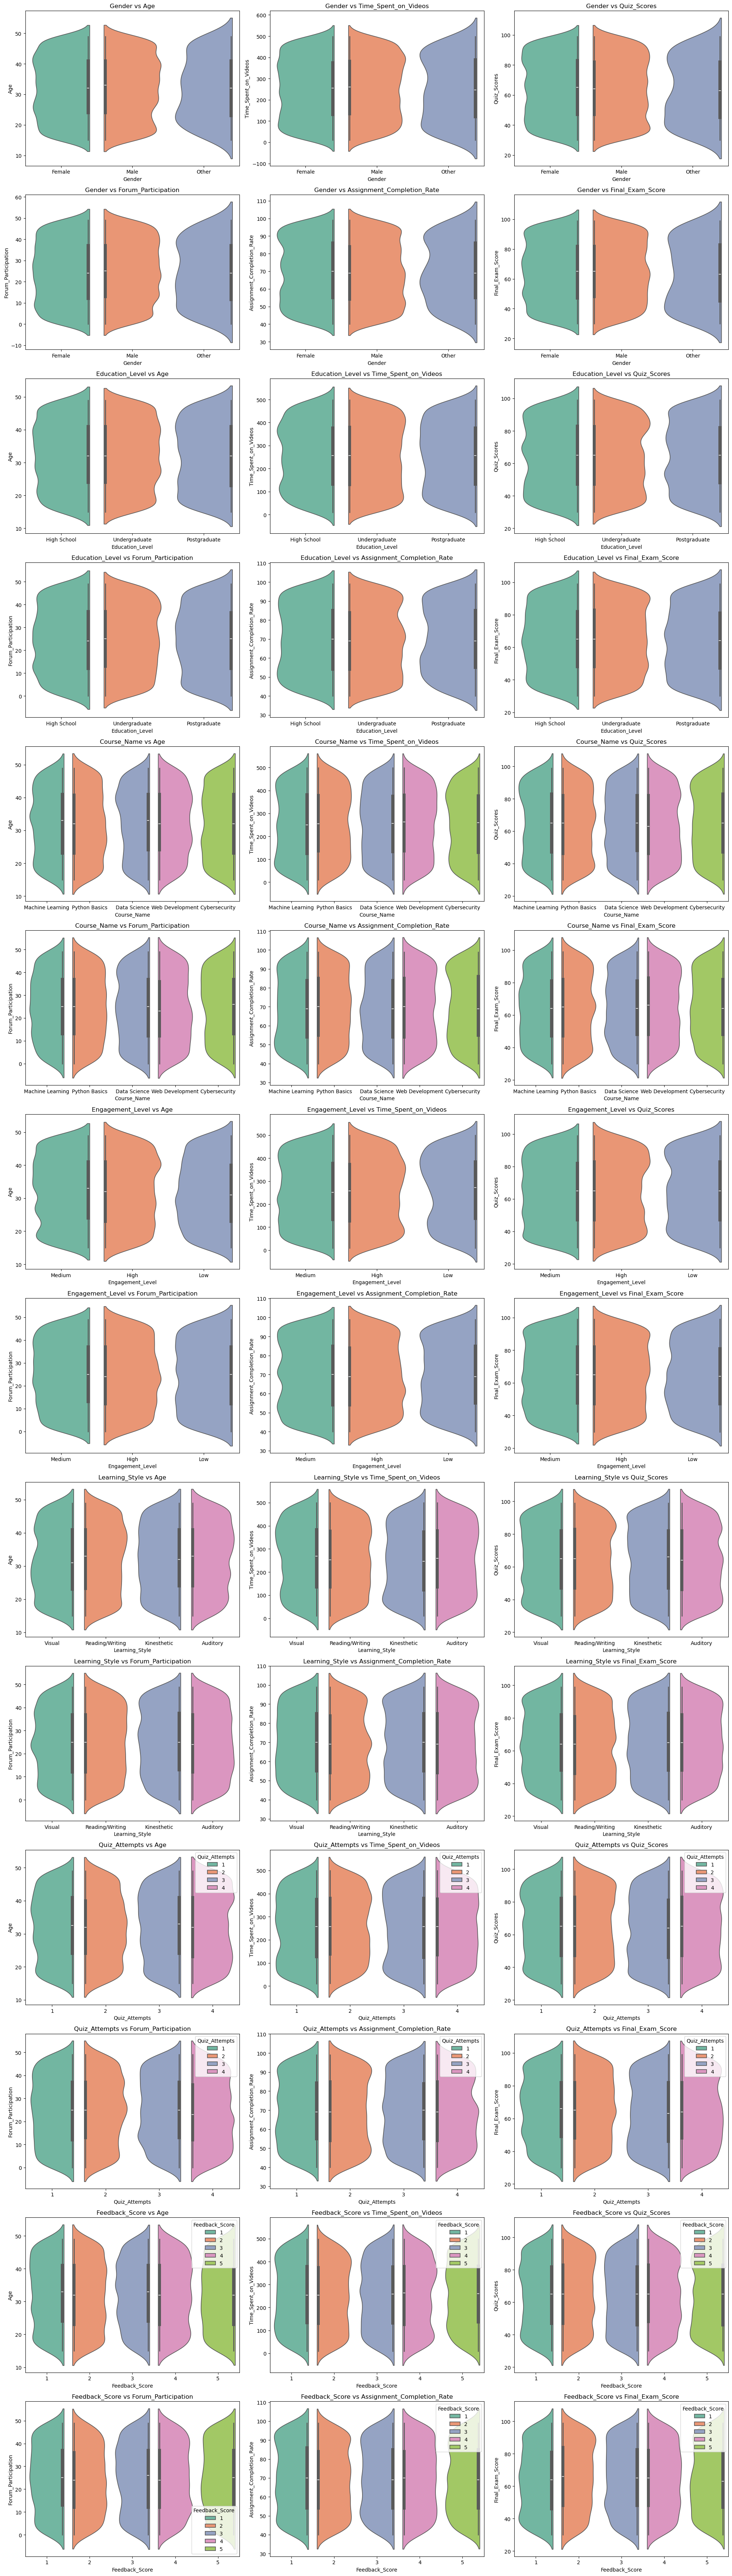

In [10]:
# 수치형 변수와 범주형 범수 사이의 관계

n_cols = 3  
n_rows = len(categories) * len(numeric_columns) // n_cols + (len(categories) * len(numeric_columns) % n_cols > 0)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()

for i, category in enumerate(categories):
    for j, numeric_column in enumerate(numeric_columns):
        ax_idx = i * len(numeric_columns) + j 
        ax = axes[ax_idx]  
        
        sns.violinplot(data=data, x=category, y=numeric_column, hue=category, palette="Set2", ax=ax, split=True)
        ax.set_title(f'{category} vs {numeric_column}')
        ax.set_xlabel(category)
        ax.set_ylabel(numeric_column)

plt.tight_layout()
plt.show()


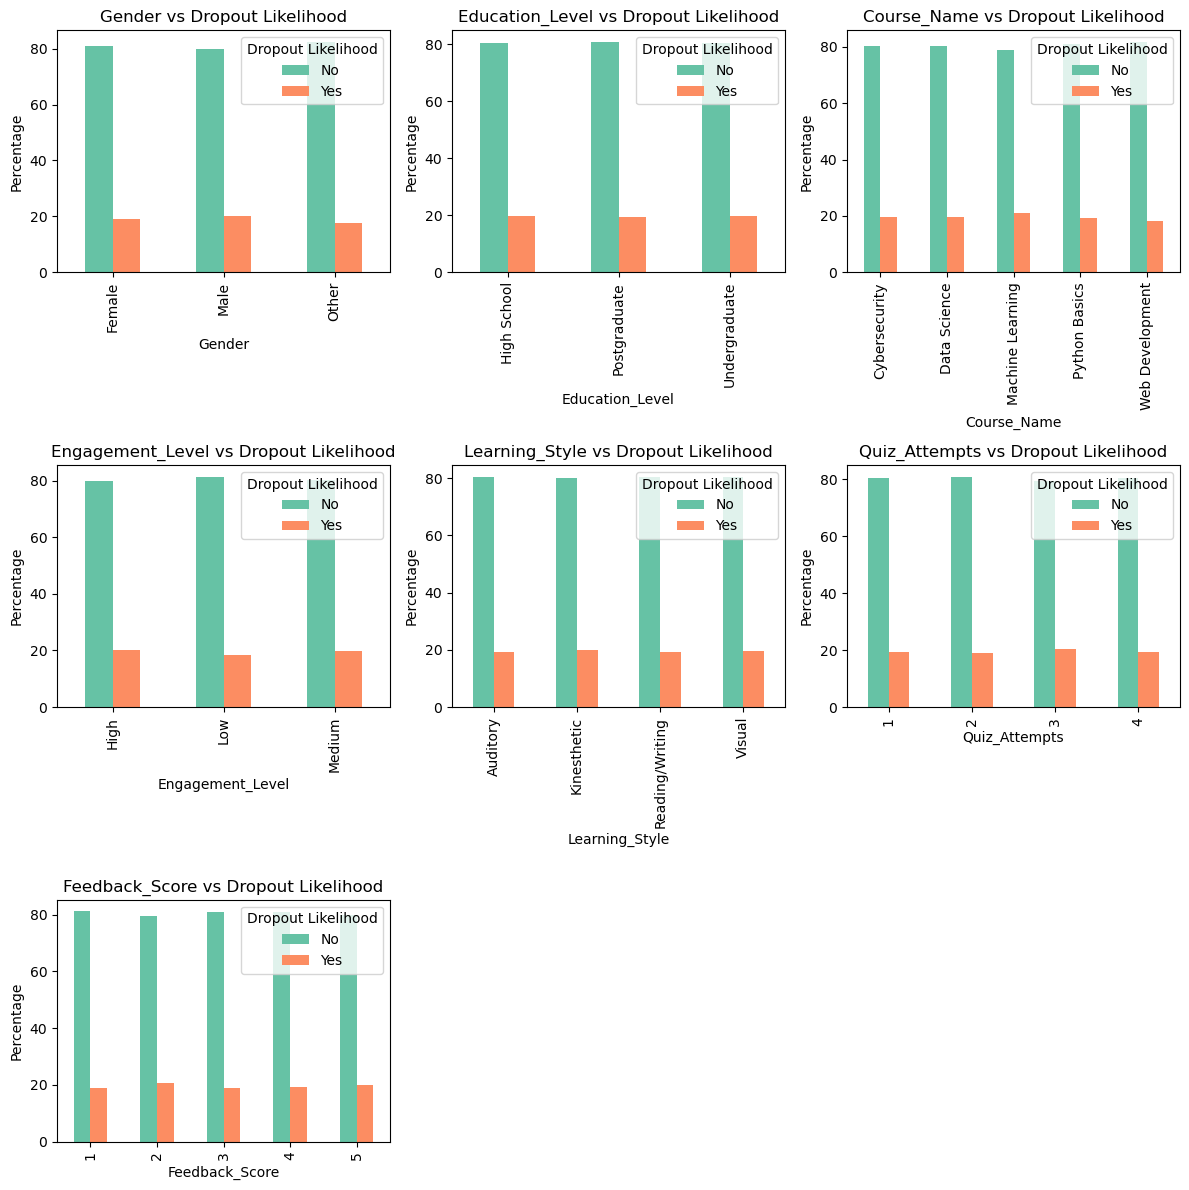

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#각 범주형 변수와 dropout의 관계 파악

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12)) 
axes = axes.flatten()  


for i, category in enumerate(categories):
    freq_table = data.groupby([category, 'Dropout_Likelihood']).size().unstack(fill_value=0)
    freq_table_percentage = freq_table.div(freq_table.sum(axis=1), axis=0) * 100
    freq_table_percentage.plot(kind='bar', ax=axes[i], color=sns.color_palette("Set2"), legend=True)
    
    axes[i].set_title(f'{category} vs Dropout Likelihood')
    axes[i].set_xlabel(category)
    axes[i].set_ylabel('Percentage')
    axes[i].legend(title='Dropout Likelihood')
axes[-1].axis('off')
axes[-2].axis('off')

plt.tight_layout()
plt.show()

#카이제곱 검정으로 그룹별 분포 차이가 있는지 확인 필요


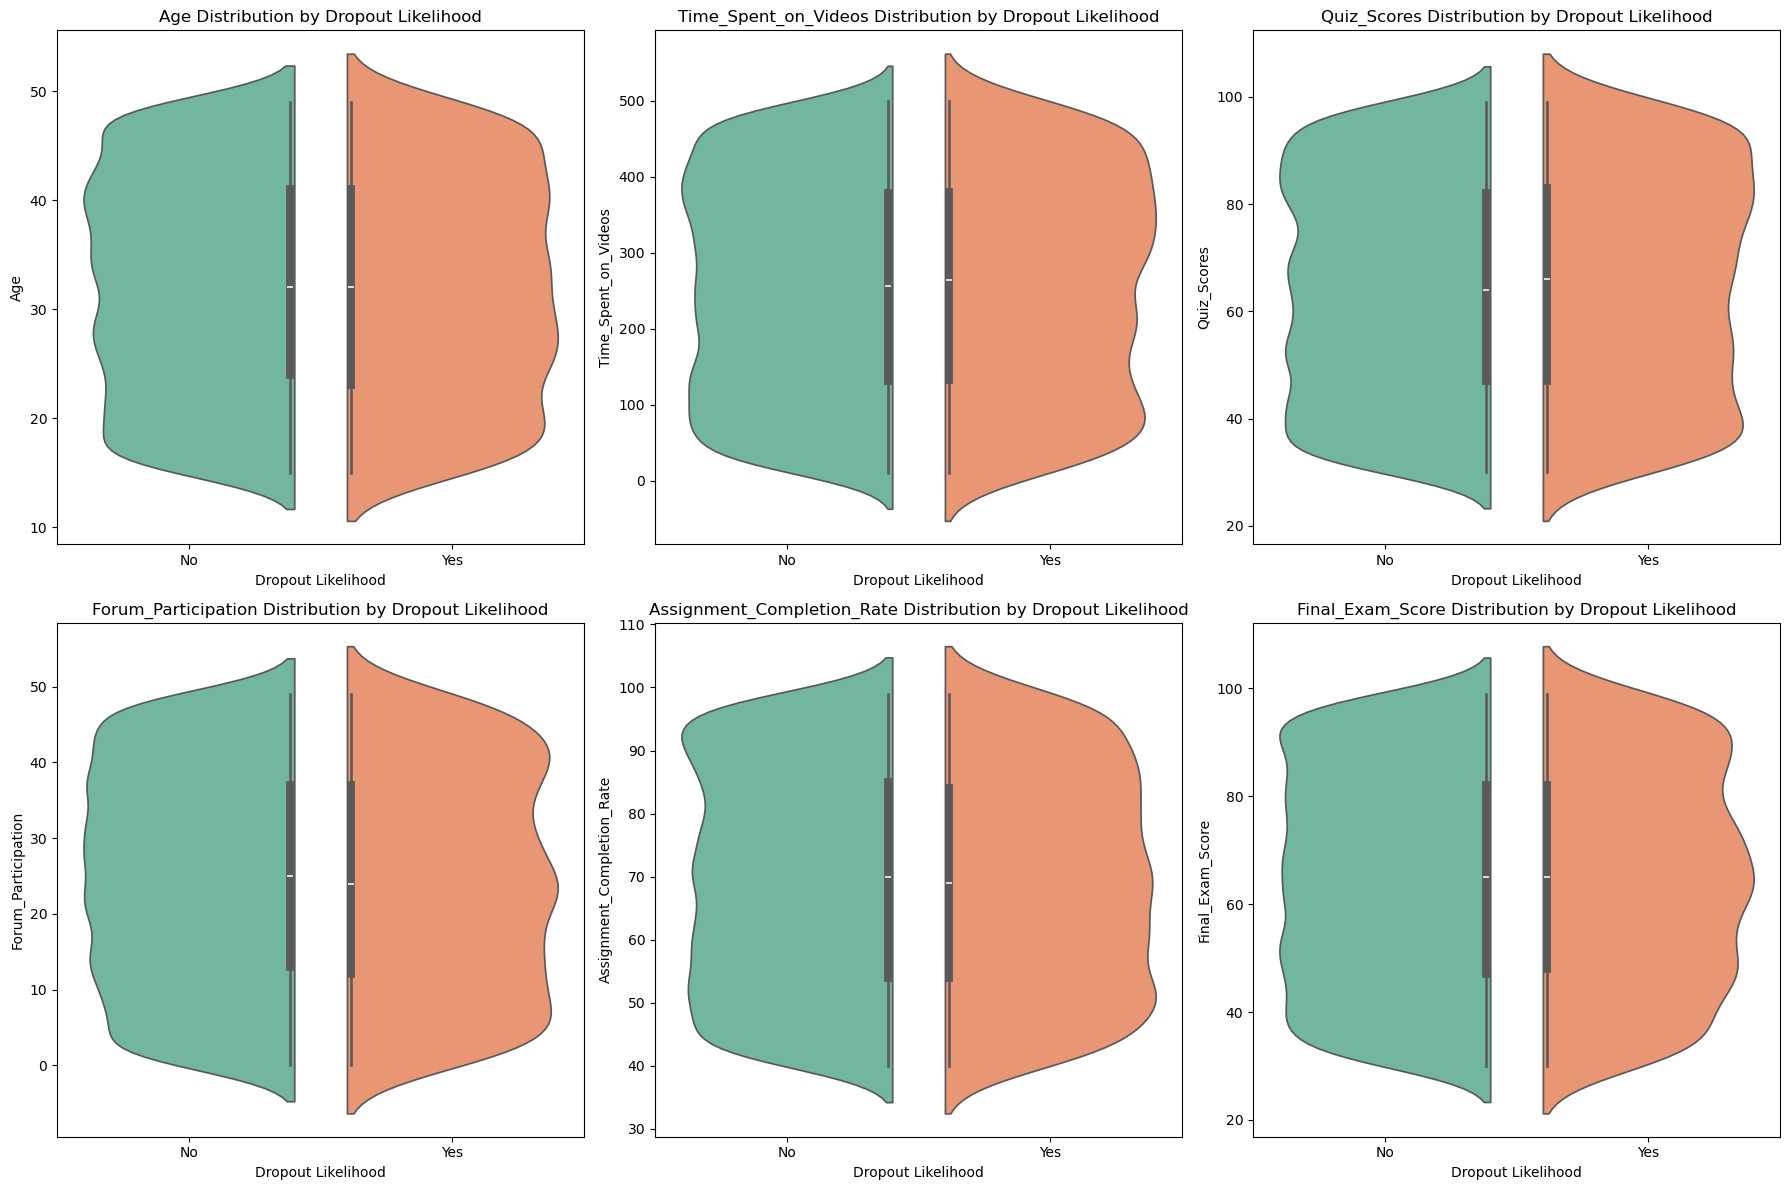

In [12]:
# 수치형 변수와 dropout 사이의 관계
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))  
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.violinplot(data=data, x='Dropout_Likelihood', y=column, hue='Dropout_Likelihood', palette="Set2", ax=axes[i], split=True)
    axes[i].set_title(f'{column} Distribution by Dropout Likelihood')
    axes[i].set_xlabel('Dropout Likelihood')
    axes[i].set_ylabel(column)



plt.tight_layout()
plt.show()


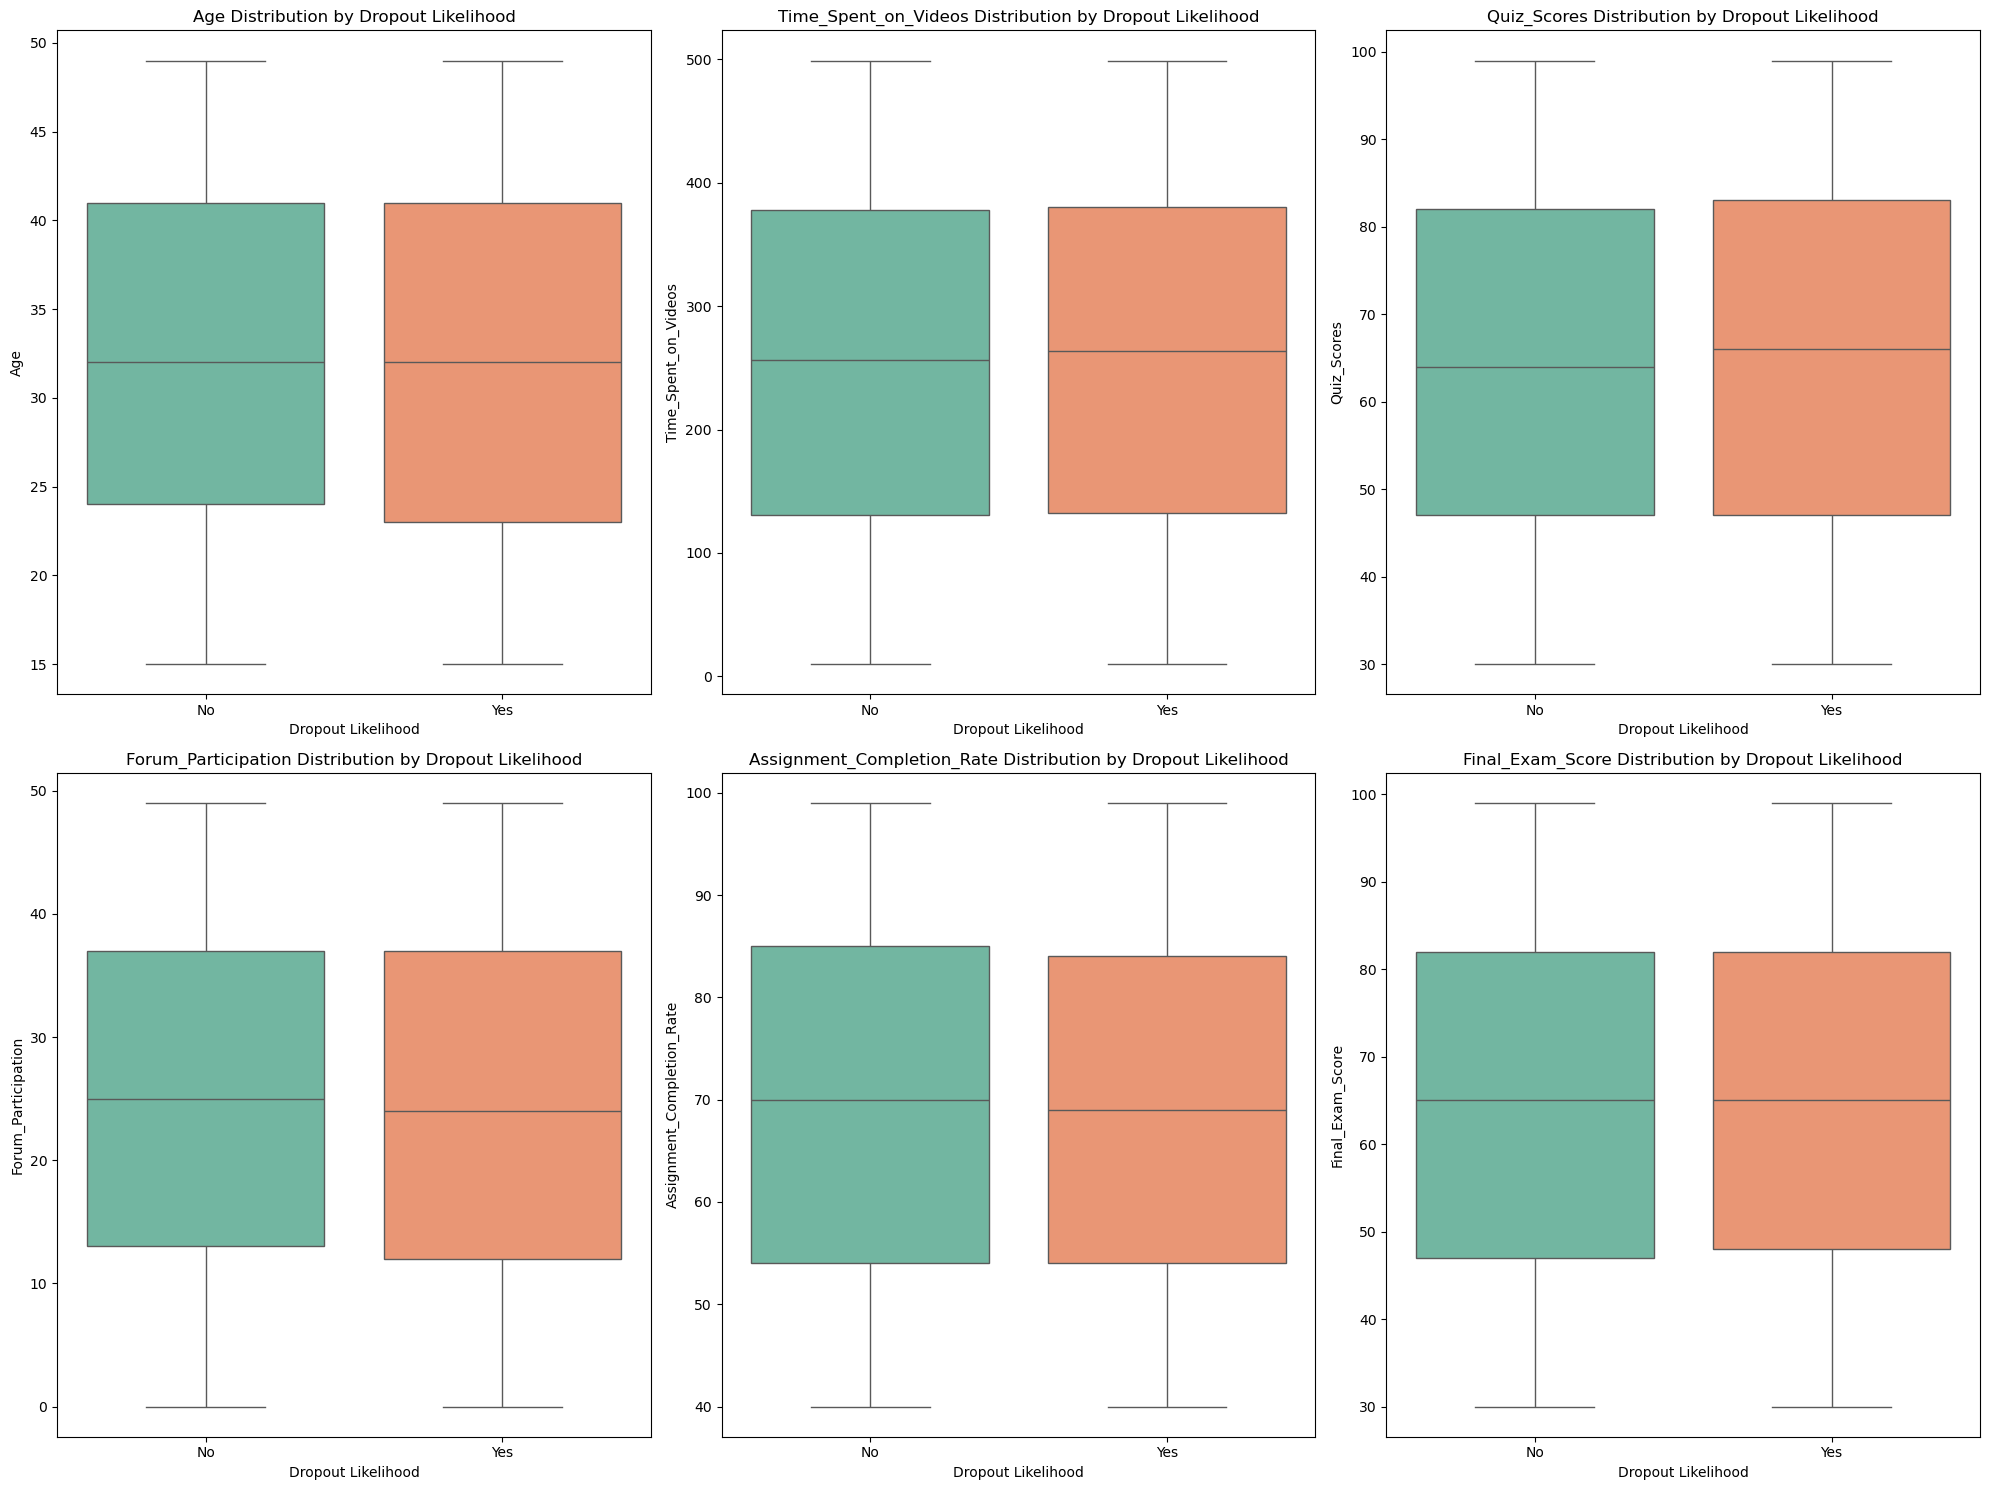

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))  
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(data=data, x='Dropout_Likelihood', y=column, hue='Dropout_Likelihood', 
                palette="Set2", ax=axes[i], showfliers=True)
    axes[i].set_title(f'{column} Distribution by Dropout Likelihood')
    axes[i].set_xlabel('Dropout Likelihood')
    axes[i].set_ylabel(column)


plt.tight_layout()
plt.show()

# Task 3.

### 분석 목적 : 

교육 현장에서 학생이 해당 수업을 Drop하고자 하는 마음을 먹었는지를 예측할 수 있다면, 이를 막기 위한 예방을 할 수 있다. 
따라서 학생의 학습 특성에 따라 Drop의 여부를 예측하는 모델을 구축하는 것이 궁극적인 목적
이를 위해 각 변수들 사이의 관계를 우선적으로 파악함

### 인사이트 : 

drop_out의 유무에 따라서 다른 변수들 사이에 차이가 있을 것이라 예상하고 분석을 시도했으나, 
범주형 변수에서는 큰 차이를 느끼지 못함
수치형 변수 역시 분포에서 엄청나게 큰 차이가 생기는 것은 확인할 수 없음.

결측치도 없고, 너무 잘 가공된 데이터가 아닌가 싶어서, 좀 더 raw한 데이터를 찾아봐야할 것 같음.